In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [2]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260203/4_SiPM_ChannelsTest_Ch1-4_Ch2_Ch5-8_Ch14_QT_Thr20_Hys0_Banana.csv'))
dfs.append(pd.read_csv('../data/260203/3_SiPM_ChannelsTest_Ch1-4_Ch2_Ch5-8_Ch14_QT_Thr20_Hys0_Background.csv'))

dfs[1]

,Detector,ID,Trigger,Time_sub,Time_sec,Time_gps,Temp,Ch1,Ch2,Ch3,...,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Argmax,Summed
0,5,205539,21,23950377,18820,42069,149,150,176,104,...,130,142,123,117,120,113,107,135,2,2032
1,5,205540,21,23958982,18820,42069,149,150,175,103,...,129,141,122,118,120,97,107,135,2,2010
2,5,205541,20,23958982,18820,42069,149,150,181,103,...,129,140,122,117,120,133,107,136,2,2047
3,5,205542,21,23977824,18820,42069,149,149,246,103,...,129,140,123,117,120,129,107,136,2,2109
4,5,205543,20,23977824,18820,42069,149,149,157,103,...,129,141,122,117,121,172,107,135,14,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99959,5,305533,20,35277394,19022,42069,149,151,236,103,...,127,140,123,117,120,115,107,135,2,2086
99960,5,305534,20,35277394,19022,42069,149,150,215,104,...,131,139,123,118,121,150,108,136,2,2107
99961,5,305535,20,35277394,19022,42069,149,149,266,102,...,130,140,123,118,121,140,107,135,2,2141
99962,5,305536,20,35277394,19022,42069,149,151,213,104,...,130,140,123,118,119,104,108,137,2,2062


In [3]:
import matplotlib.pyplot as plt

N_BINS = 512
BITS_12 = 2**12

summed_spectra = [df['Summed'].tolist() for df in dfs]

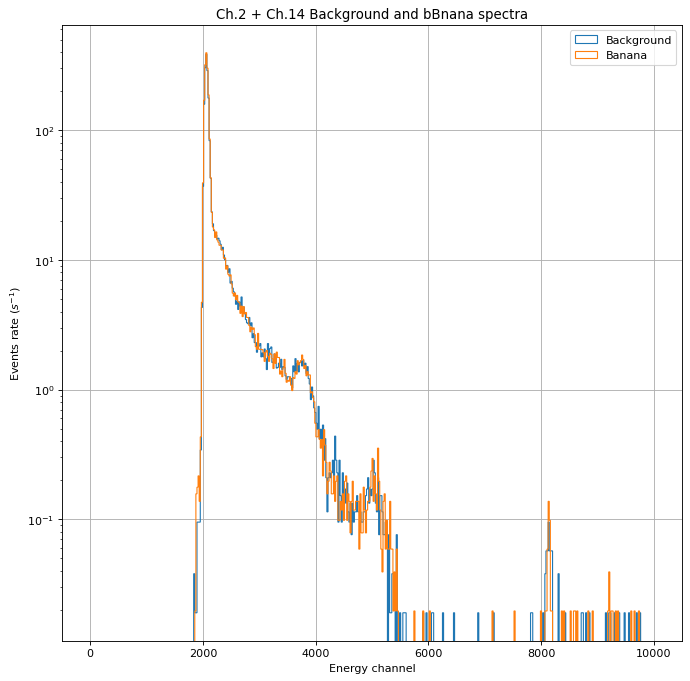

In [5]:
import numpy as np
times = [52.526, 50.871]
plt.figure(figsize=(10,10), dpi=80)
legend = ['Background', 'Banana']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0, 10000), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Events rate ($s^{-1}$)')
plt.title('Ch.2 + Ch.14 Background and bBnana spectra')
# plt.xticks(np.arange(1800,4000,100))
plt.grid()
plt.show()